<font size='14'>**Import Libraries** <font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics

import sklearn as sk

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

<font size='14'>**Loading Data** </font>

In [2]:
data = pd.read_csv('fetal_health.csv')
x_data= pd.DataFrame(data.iloc[:,0:-1])
y_data = pd.DataFrame(data.iloc[:,-1])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

<font size='14'>**Data Analysis** <font>

<font size='6'>**Descriptive statistics** </font>

In [3]:
data.describe().T

count        mean  \
baseline value                                      2126.0  133.303857   
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
severe_decelerations                                2126.0    0.000003   
prolongued_decelerations                            2126.0    0.000159   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_min                                       2126.0   93.579492   
histogram_max                                       2126.0  164.025400   
histogram_number_of_peaks                           2126.0    4.068203   
histogram_number_of_zeroes                          2126.0    0.323612   
histogram_mode                                      2126.0  137.452023   
histogram_mean                                      2126.0  134.610536   
histogram_median                                    2126.0  138.090310   
histogram_variance                                  2126.0   18.808090   
histogram_tendency                                  2126.0    0.320320   
fetal_health                                        2126.0    1.304327   

                                                          std    min      25%  \
baseline value                                       9.840844  106.0  126.000   
accelerations                                        0.003866    0.0    0.000   
fetal_movement                                       0.046666    0.0    0.000   
uterine_contractions                                 0.002946    0.0    0.002   
light_decelerations                                  0.002960    0.0    0.000   
severe_decelerations                                 0.000057    0.0    0.000   
prolongued_decelerations                             0.000590    0.0    0.000   
abnormal_short_term_variability                     17.192814   12.0   32.000   
mean_value_of_short_term_variability                 0.883241    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.396880    0.0    0.000   
mean_value_of_long_term_variability                  5.628247    0.0    4.600   
histogram_width                                     38.955693    3.0   37.000   
histogram_min                                       29.560212   50.0   67.000   
histogram_max                                       17.944183  122.0  152.000   
histogram_number_of_peaks                            2.949386    0.0    2.000   
histogram_number_of_zeroes                           0.706059    0.0    0.000   
histogram_mode                                      16.381289   60.0  129.000   
histogram_mean                                      15.593596   73.0  125.000   
histogram_median                                    14.466589   77.0  129.000   
histogram_variance                                  28.977636    0.0    2.000   
histogram_tendency                                   0.610829   -1.0    0.000   
fetal_health                                         0.614377    1.0    1.000   

                                                        50%      75%      max  
baseline value                                      133.000  140.000  160.000  
accelerations                                         0.002    0.006    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.004    0.007    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe

# Histogram

In [5]:
histogram_traces = []

for col in x_data.columns:
    histogram_trace = go.Histogram(x=x_data[col], name=col, visible=False)
    histogram_traces.append(histogram_trace)

histogram_traces[0].visible = False

buttons = []
for i, col in enumerate(x_data.columns):
    button = dict(
        method='update',
        args=[{'visible': [i == j for j in range(len(histogram_traces))]},
              {'title': f'Histogram of {col}', 'xaxis': {'title': col}}],
        label=col
    )
    buttons.append(button)

updatemenus = [{'type': 'dropdown', 'buttons': buttons, 'showactive': True,'borderwidth':1}]

layout = go.Layout(
    title='Histograms of Fetal Health Classification Attributes',
    title_x=0.5,
    updatemenus=updatemenus,
    barmode='overlay',
    margin=dict(l=100, r=50, t=100, b=50))

fig = go.Figure(data=histogram_traces, layout=layout)

fig.show()


<font size='6'>**Mising values** </font>

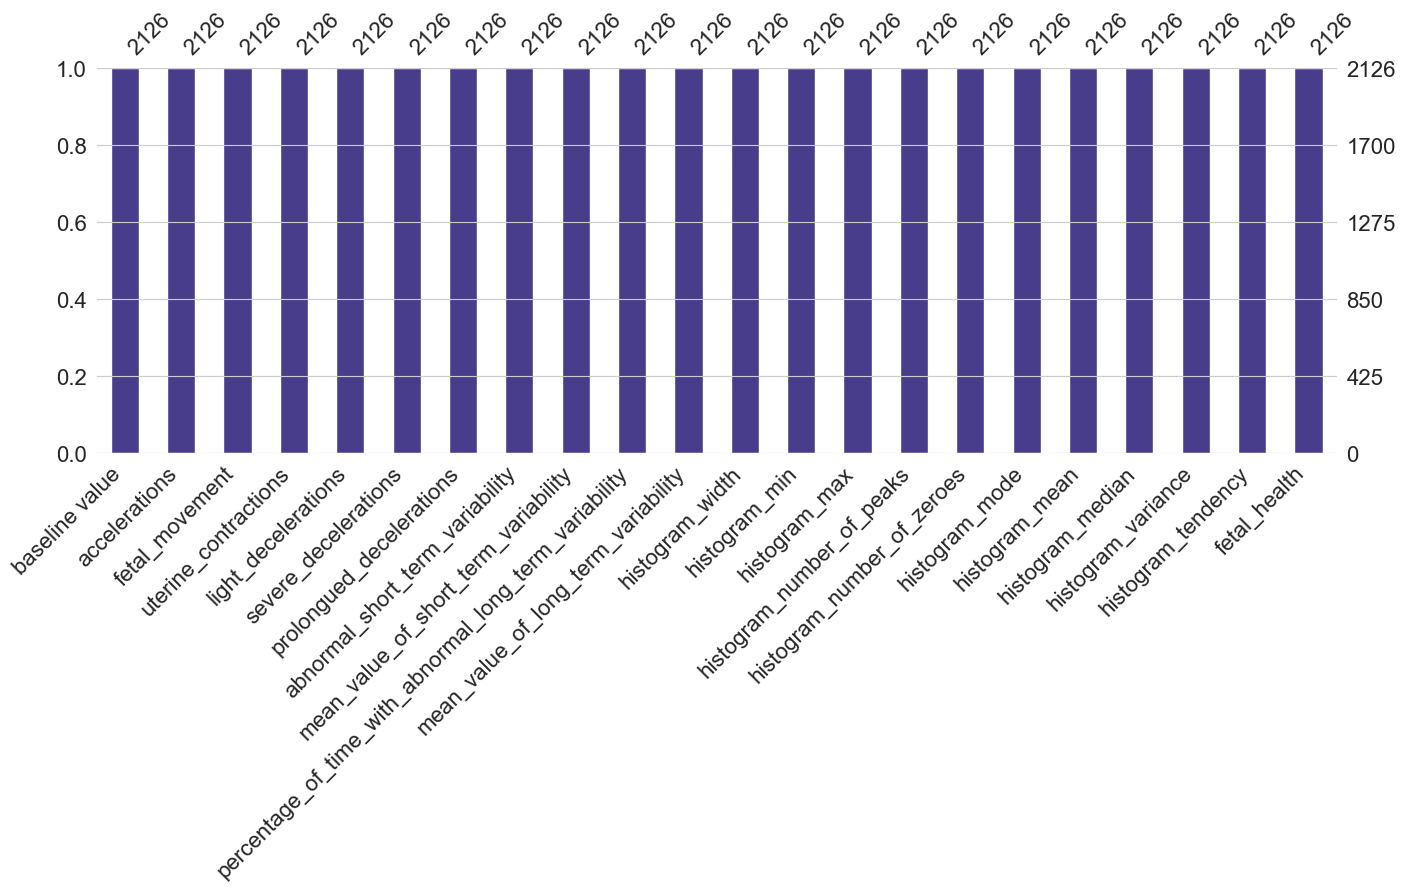

In [6]:
#visualize for missing value
missing_values = msno.bar(data, figsize = (16,5),color = "#483D8B")

<font size='6'>**Outliers** </font>


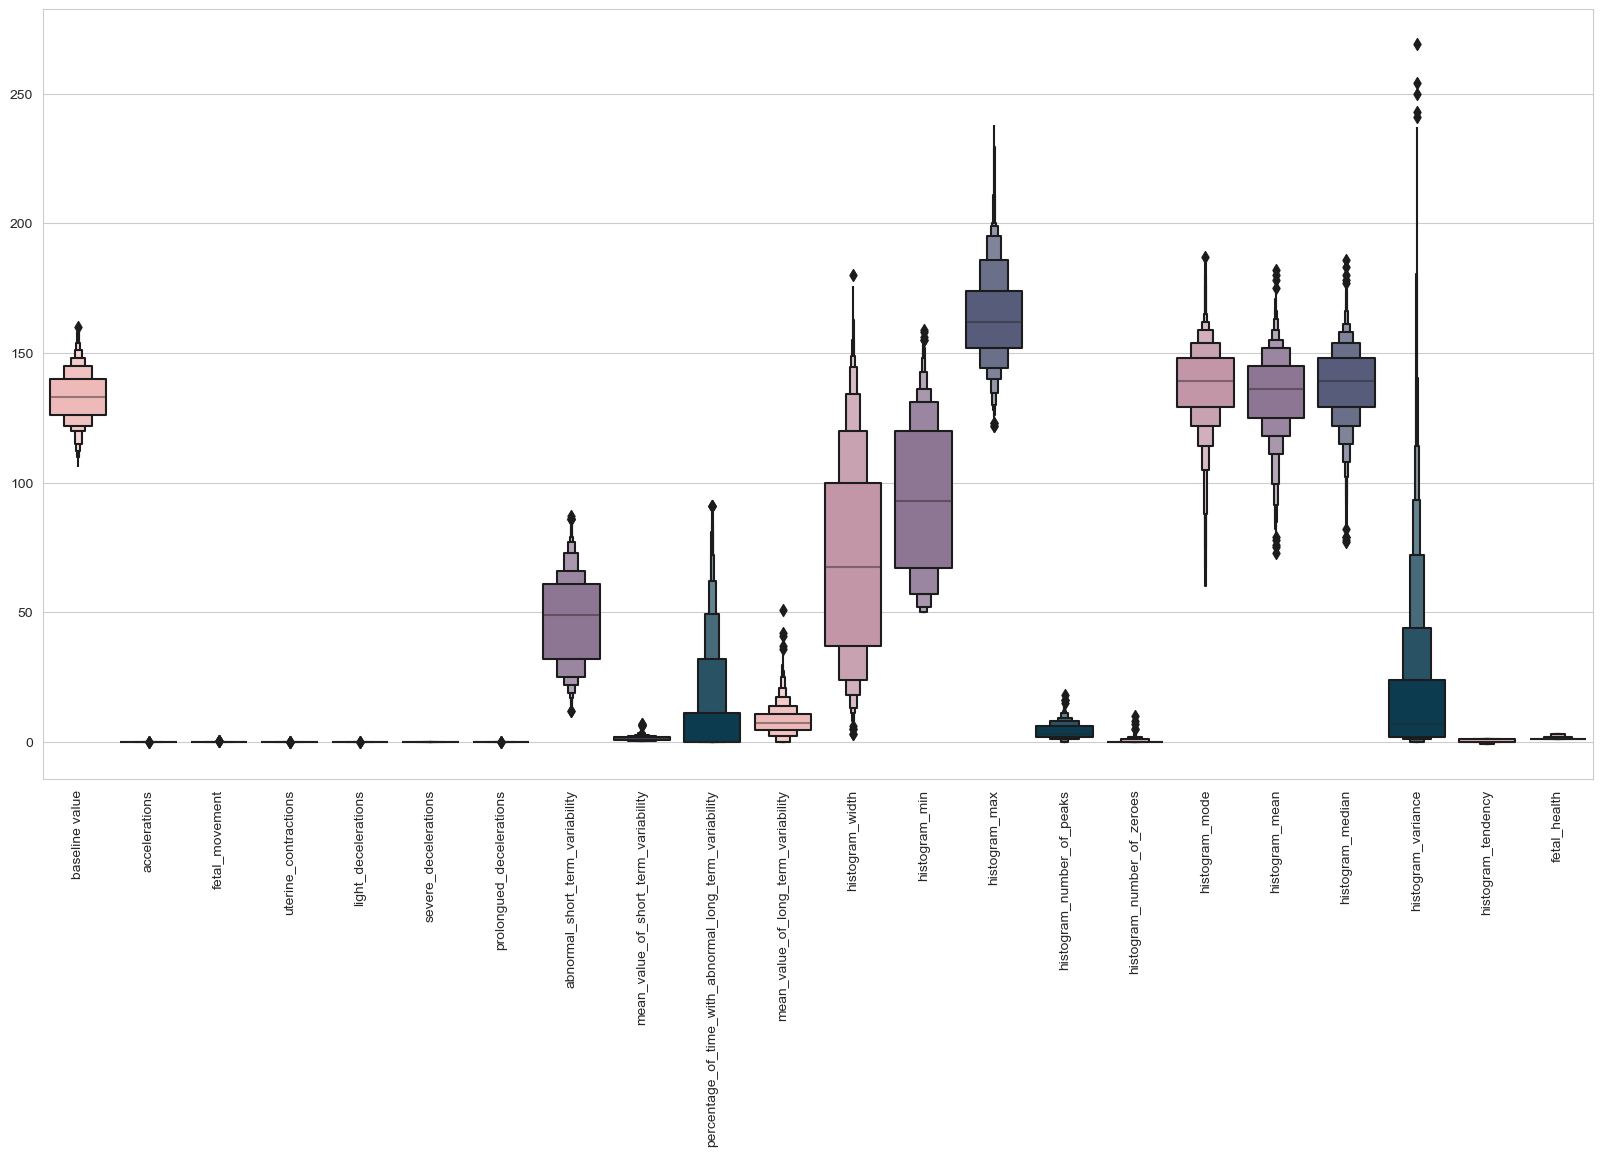

In [7]:
color =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = data,palette = color)
plt.xticks(rotation=90)
plt.show()

<font size='6'>**Imbalance Data** </font>

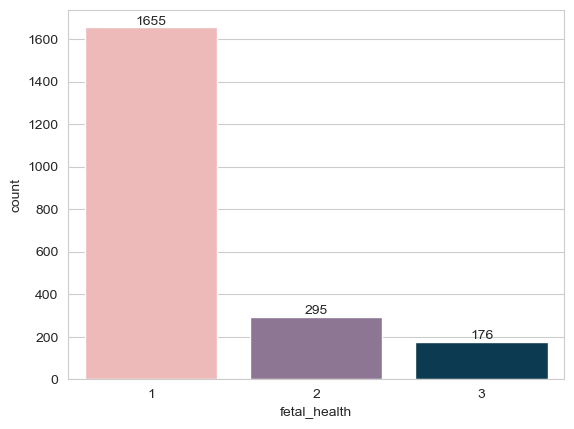

In [8]:
colours=["#f7b2b0","#8f7198", "#003f5c"]
ax = sns.countplot(data= data, x="fetal_health",palette=colours)
ax.bar_label(ax.containers[0])
plt.show()

<font size='6'>**Correlation matrix** </font>

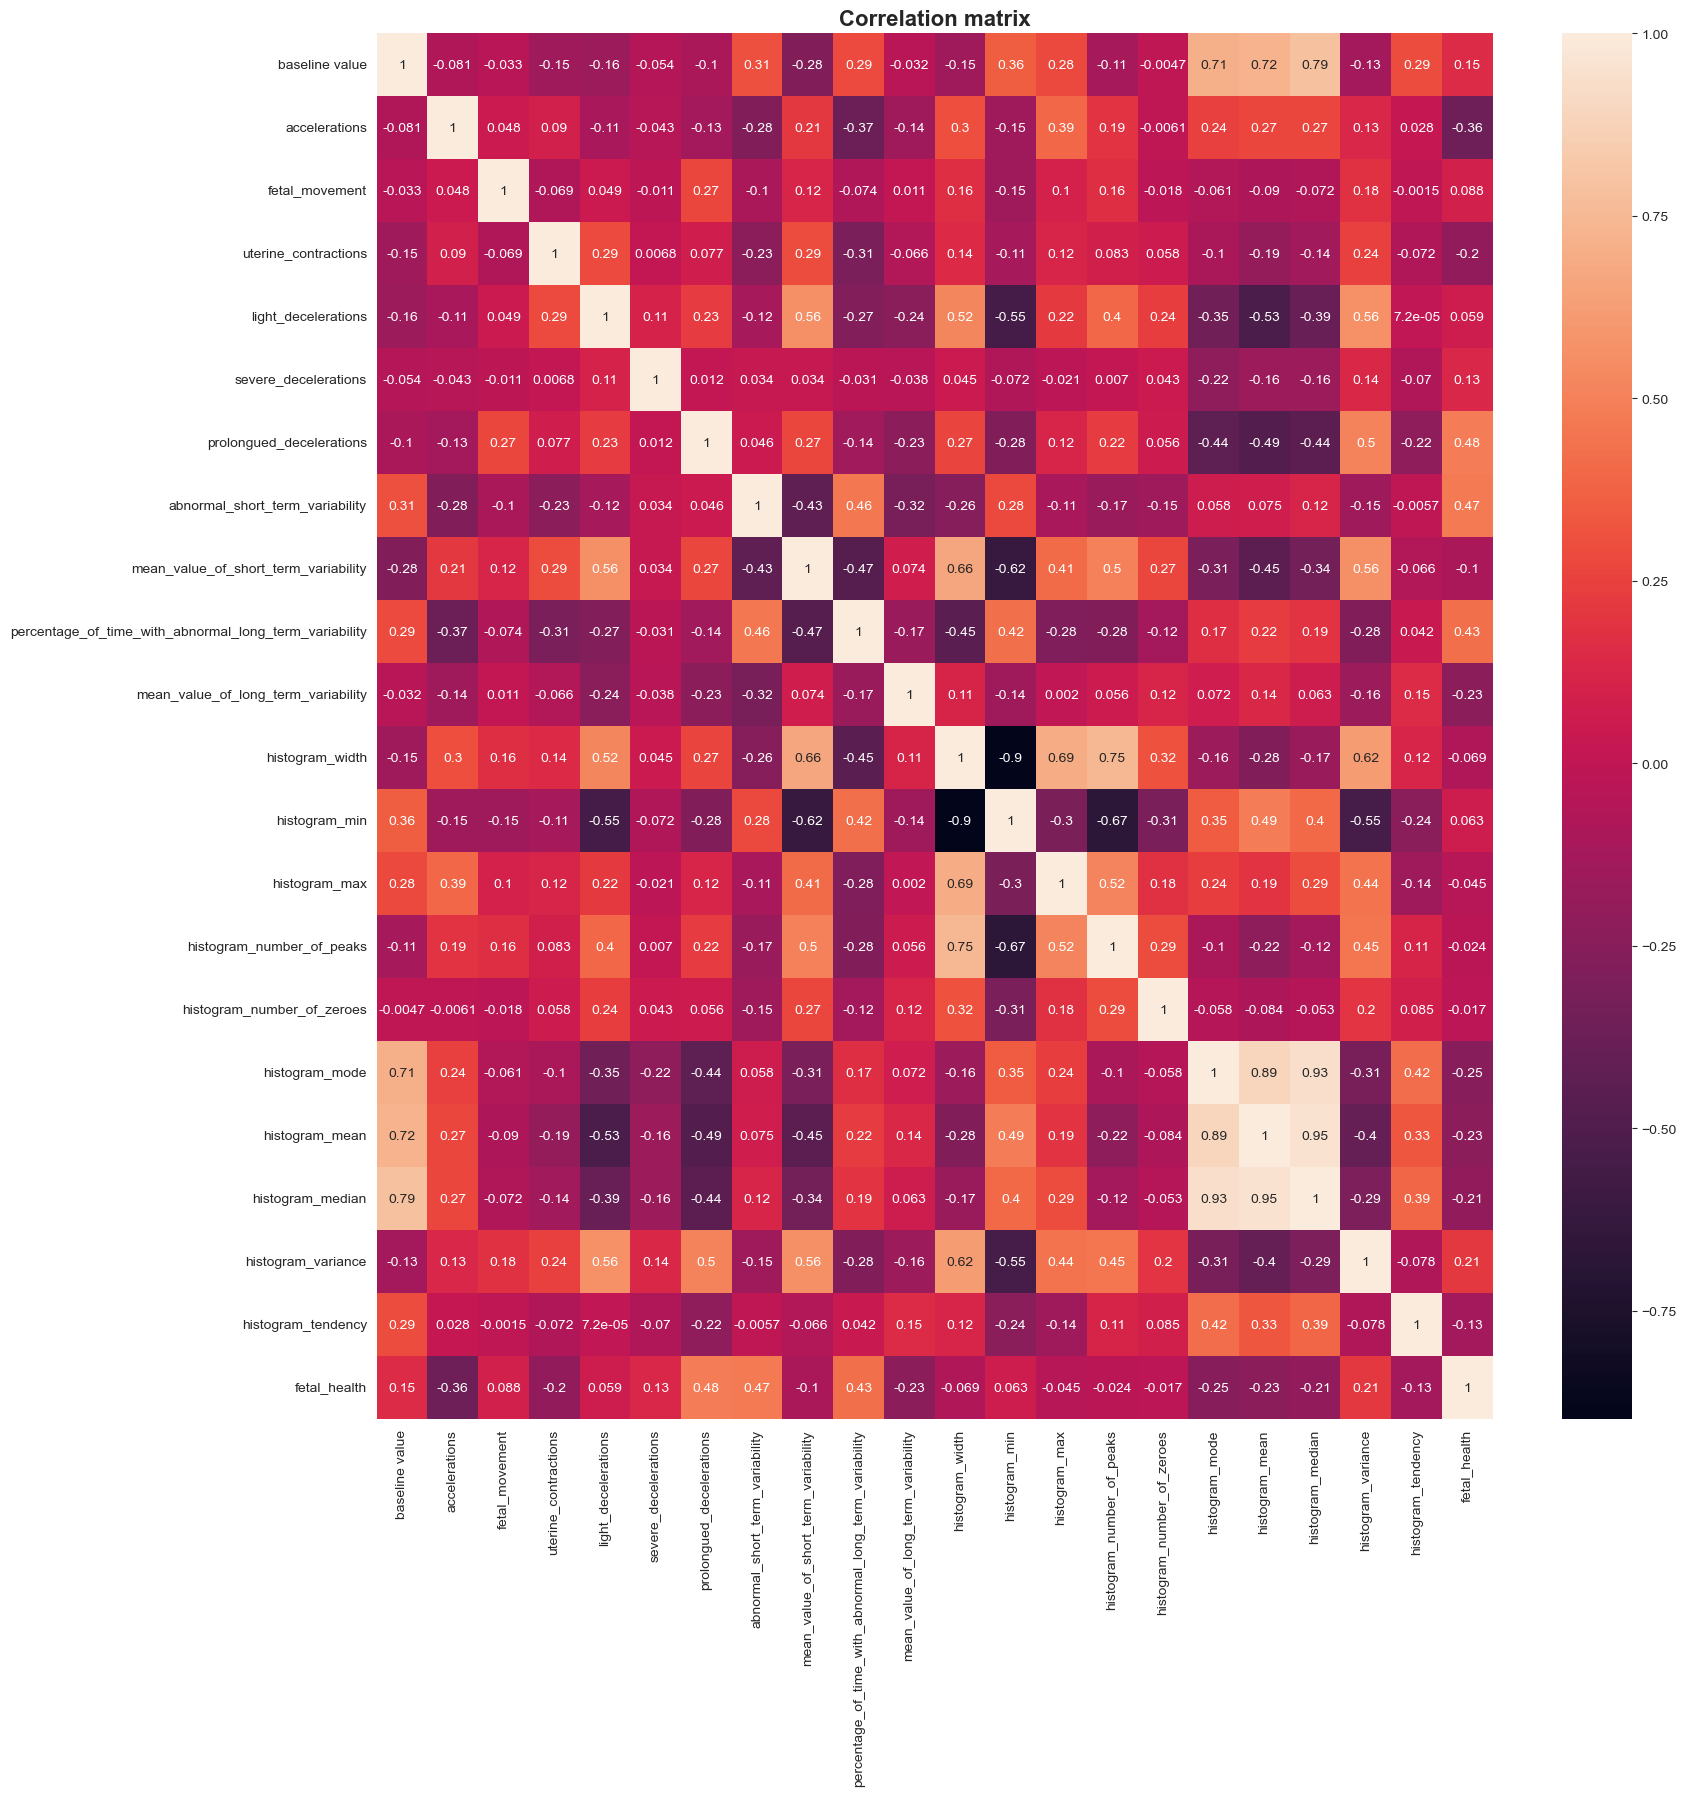

In [9]:
corr = data.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=True)
plt.title('Correlation matrix', weight = 'bold', fontsize=16)
plt.show()

# Interactive Heatmap

In [10]:
fig = px.imshow(corr.values,
                x=corr.index,
                y=corr.columns,
                aspect="auto",
                zmin=-1,
                zmax=1,
                color_continuous_scale='RdBu')

fig.update_layout(title="Interactive Correlation Matrix",
                  title_x=0.5,
                  width=1000,
                  height = 900)

fig.update_traces(hovertemplate='X: %{x}<br>Y: %{y}<br>Correlation: %{z:.2f}')
fig.show()


<font size='6'>**Correlation matrix with targeted variable** </font>

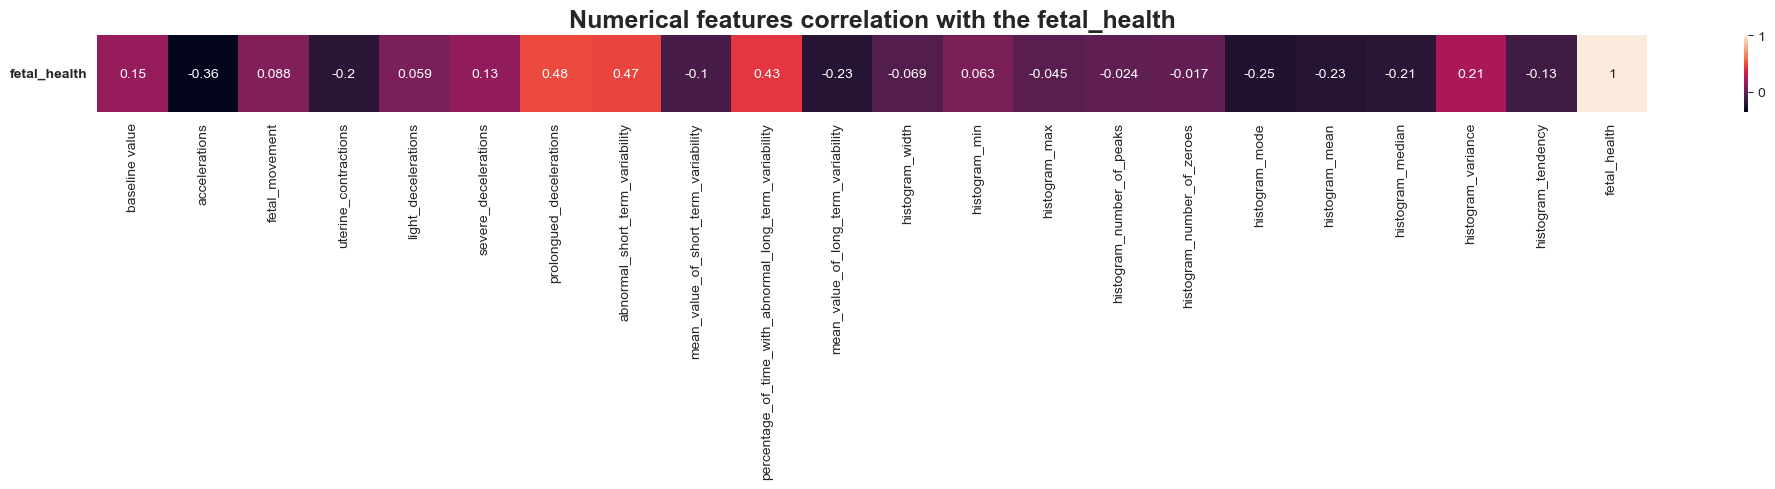

In [11]:
numeric_data = data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["fetal_health"],ascending=False).head(1), annot=True)
plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=18)
plt.yticks(weight="bold", rotation=0)
plt.show()

In [12]:
#top 5 variables that are highly associated with 'fetal_health'
Num_feature = abs(numeric_corr["fetal_health"]).sort_values(ascending=False).head(6).to_frame()
Num_feature

fetal_health
fetal_health                                            1.000000
prolongued_decelerations                                0.484859
abnormal_short_term_variability                         0.471191
percentage_of_time_with_abnormal_long_term_vari...      0.426146
accelerations                                           0.364066
histogram_mode                                          0.250412

<font size='6'>**Scaling the data and handle imbalance data** </font>

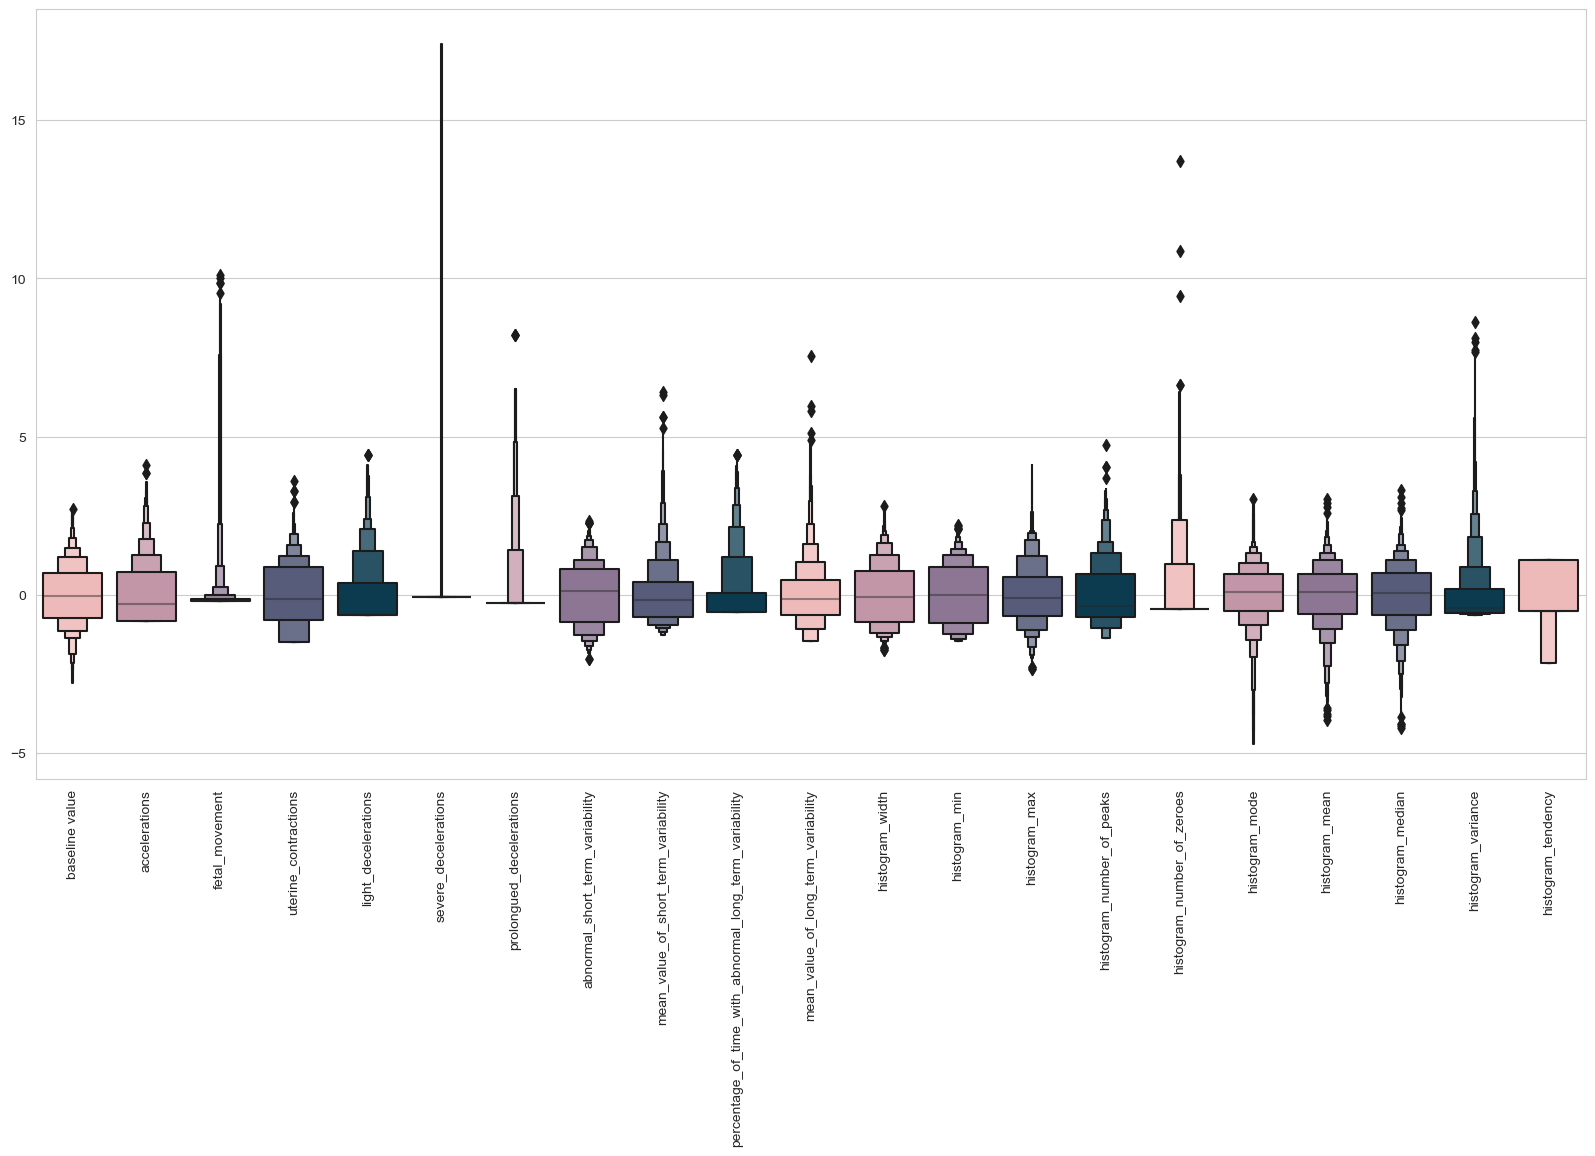

In [13]:
x=data.drop(["fetal_health"],axis=1)
y=data["fetal_health"]

features =  list(x.columns)
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=features)

color =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = x_scaled,palette = color)
plt.xticks(rotation=90)
plt.show()

[Text(0, 0, '1655'), Text(0, 0, '1655'), Text(0, 0, '1655')]

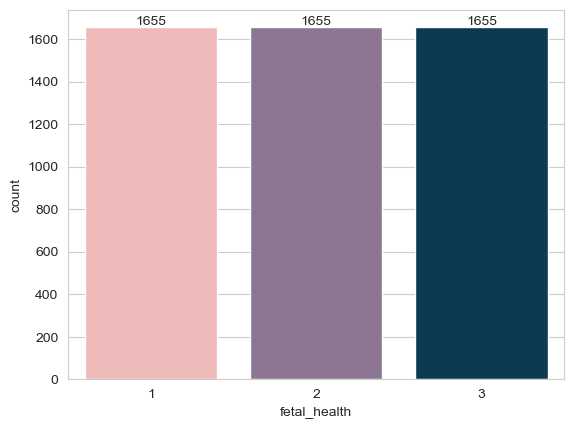

In [14]:
oversample = RandomOverSampler(sampling_strategy='not majority')
x_scaled_over, y_over = oversample.fit_resample(x_scaled, y)
y_over = pd.DataFrame(y_over)

colours=["#f7b2b0","#8f7198", "#003f5c"]
ax=sns.countplot(data=y_over,x='fetal_health',palette=colours)
ax.bar_label(ax.containers[0])

<font size='14'>**Principal Component Analysis**</font >
- Unsupervised, linear method

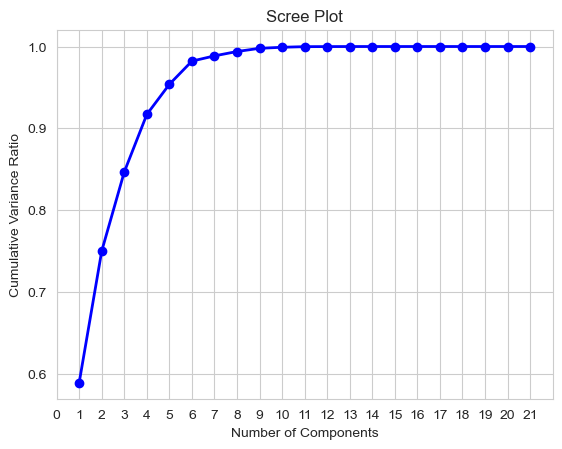

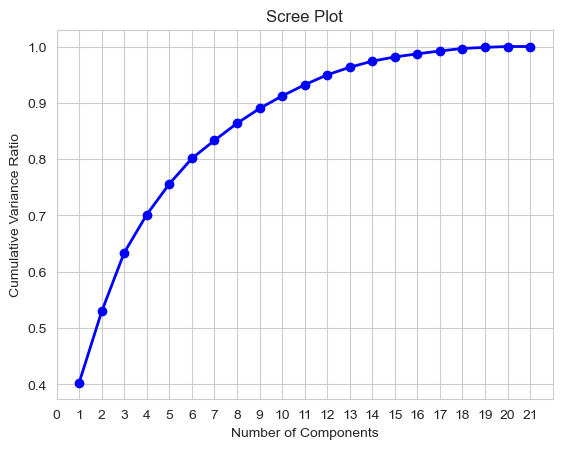

Optimal number of components suggested from sceen plot: 10


In [15]:
def scee_plot(data):
    pca = PCA()
    pca.fit(data)
    variance = pca.explained_variance_ratio_

    var_cumulative = np.cumsum(variance)
    plt.plot(range(1, len(variance) + 1), var_cumulative, 'bo-', linewidth=2)
    plt.xticks(np.arange(0, 22, step=1))
    plt.title('Scree Plot')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Variance Ratio')
    plt.show()
    diff_var = np.diff(var_cumulative, prepend=0)
    elbow_index = np.argmax(diff_var < diff_var.mean() / 2)
    n_components = elbow_index + 1
    return n_components

n_components_raw=scee_plot(x)
n_components=scee_plot(x_scaled_over)
print(f"Optimal number of components suggested from sceen plot: {n_components}")

In [16]:
def PCA_3D_plot(x_data, y_data, n):
    pca = PCA(n_components=n)
    x_pca = pca.fit_transform(x_data)

    total_var = pca.explained_variance_ratio_.sum() * 100
    label_dict = {1:'Normal', 2:'Suspect', 3:'Pathological'}
    label_y_data = y_data['fetal_health'].replace(label_dict)

    fig = px.scatter_3d(
        x_pca, x=0, y=1, z=2, color=label_y_data )

    fig.update_layout(scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'),
        title=go.layout.Title(
            text=f'Total Explained Variance: {total_var:.2f}%')
    )
    fig.show()

PCA_3D_plot(x_scaled_over,y_over,n_components_raw)
PCA_3D_plot(x_scaled_over,y_over,n_components)


## Top 10 Features from PCA

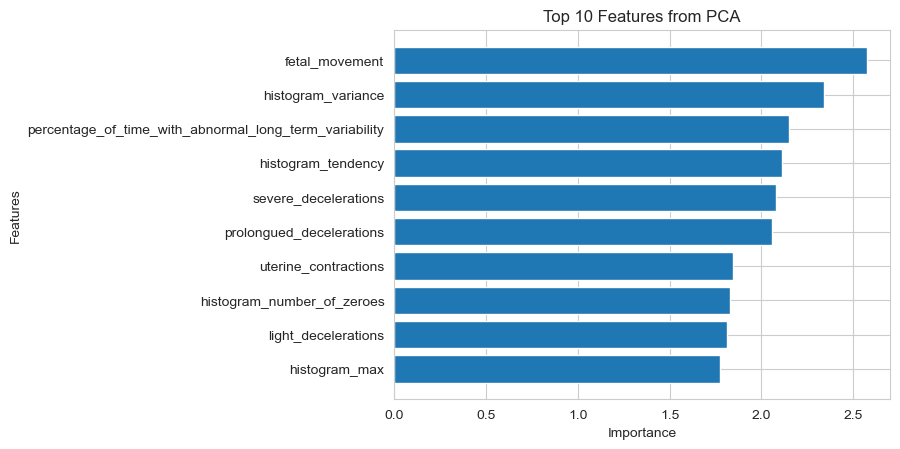

In [17]:
def imp_feaures(x,n_components):
    pca = PCA(n_components)
    x_pca = pca.fit_transform(x)

    importance = pd.DataFrame(pca.components_, columns=x.columns)
    importance = importance.abs().sum(axis=0).sort_values(ascending=False)
    top_features = importance[:10]

    plt.barh(top_features.index[::-1],top_features.values[::-1])
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Top 10 Features from PCA')
    plt.show()

   # return top_features

imp_feaures(x_scaled_over,n_components)


<font size='14'>**t-distributed Stochastic Neighbour Embedding (t-SNE)**</font>
 - Nonlinear, probabilistic method
 - t-SNE is a nonlinear dimensionality reduction technique that can capture complex and nonlinear relationships between data points. It is particularly useful for visualizing high-dimensional datasets in 2 or 3 dimensions. t-SNE works by preserving the distances between neighboring points in high-dimensional space while optimizing the distances between points in the low-dimensional space.

In [18]:
def plot_tsne(x_data, y_data):
    tsne = TSNE(n_components=3, random_state=0)
    x_tsne = tsne.fit_transform(x_data, )

    label_dict = {1:'Normal', 2:'Suspect', 3:'Pathological'}
    label_y_data = y_data['fetal_health'].replace(label_dict)

    fig = px.scatter_3d(x_tsne, x=0, y=1, z=2,color=label_y_data)

    fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),
    scene=dict(
        xaxis_title='Component 1',
        yaxis_title='Component 2',
        zaxis_title='Component 3'),
    title=go.layout.Title(text='t-SNE interactive plot'))
    fig.show()

plot_tsne(x_scaled_over,y_over)

## Set up data split for original data and oversampled data

In [19]:
def data_split(X, y, testSize, randomState):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = testSize, random_state = randomState)
    print("Number of train dataset: ", len(X_train))
    print("Number of test dataset: ", len(X_test))
    print("Total number of transactions: ", len(X_train)+len(X_test))
    return X_train, X_test, y_train, y_test

In [20]:
#Using original dataset
X_raw_train, X_raw_test, y_raw_train, y_raw_test = data_split(x, y, 0.3, 0)

Number of train dataset:  1488
Number of test dataset:  638
Total number of transactions:  2126


In [21]:
#Using oversampled dataset
X_over_train, X_over_test, y_over_train, y_over_test = data_split(x_scaled_over, y_over, 0.3, 0)

Number of train dataset:  3475
Number of test dataset:  1490
Total number of transactions:  4965


<font size='14'>**Model Fitting - Adaboost**</font>

In [22]:
clf_grid = AdaBoostClassifier(random_state=99)
param_grid = {
    'n_estimators': [10,25,50,75,100,125,150,200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]
}
grid_search = GridSearchCV(estimator=clf_grid, param_grid=param_grid, cv=10)
grid_search.fit(X_raw_train, np.ravel(y_raw_train))
y_raw_pred_grid = grid_search.best_estimator_.predict(X_raw_test)
accuracy = accuracy_score(y_raw_test, y_raw_pred_grid)
print('Accuracy: {:.2f}'.format(accuracy))
print('Best parameters: ', grid_search.best_params_)

Accuracy: 0.89
Best parameters:  {'learning_rate': 0.1, 'n_estimators': 150}


In [23]:
print(classification_report(y_raw_test, y_raw_pred_grid))

              precision    recall  f1-score   support

           1       0.90      0.97      0.93       494
           2       0.81      0.59      0.68        86
           3       0.95      0.62      0.75        58

    accuracy                           0.89       638
   macro avg       0.88      0.73      0.79       638
weighted avg       0.89      0.89      0.88       638



In [27]:
clf_grid = AdaBoostClassifier(random_state=99)
param_grid = {
    'n_estimators': [10,25,50,75,100,125,150,200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]
}
grid_search = GridSearchCV(estimator=clf_grid, param_grid=param_grid, cv=10)
grid_search.fit(X_over_train, np.ravel(y_over_train))
y_pred_grid = grid_search.best_estimator_.predict(X_over_test)
accuracy = accuracy_score(y_over_test, y_pred_grid)
print('Accuracy: {:.2f}'.format(accuracy))
print('Best parameters: ', grid_search.best_params_)

Accuracy: 0.90
Best parameters:  {'learning_rate': 0.5, 'n_estimators': 50}


In [28]:
print(classification_report(y_over_test, y_pred_grid))

              precision    recall  f1-score   support

           1       0.85      0.90      0.87       498
           2       0.88      0.87      0.88       481
           3       0.98      0.94      0.96       511

    accuracy                           0.90      1490
   macro avg       0.90      0.90      0.90      1490
weighted avg       0.91      0.90      0.90      1490



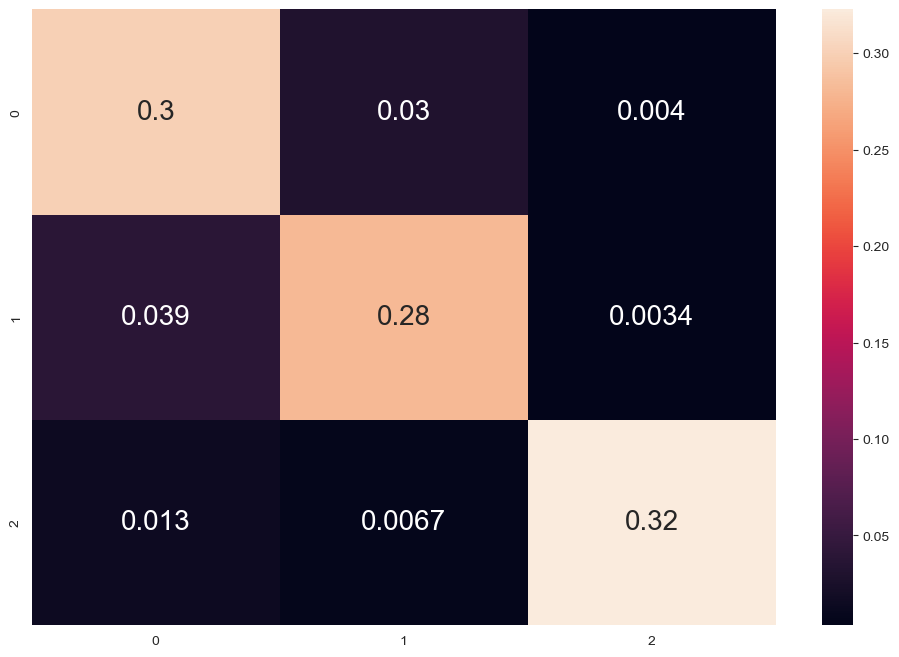

In [29]:
#confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_over_test, y_pred_grid)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot = True, annot_kws = {'size':20})
plt.show()

In [30]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_over_test)
lb.classes_.tolist()

[1, 2, 3]

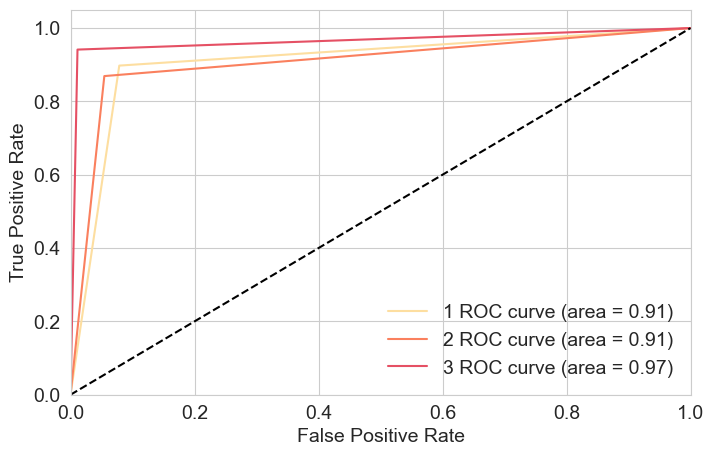

In [31]:
fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_over_test)
by_pred = lb.transform(y_pred_grid)
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(by_test[:, i], by_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

colors = ['#fddea0', '#fa805e', '#e55064', '#912b81', '#120d31']

plt.figure(figsize=(8, 5))
for i in range(3):
    plt.plot(fpr[i], tpr[i],
             label='%s ROC curve (area = %0.2f)' % (lb.classes_.tolist()[i], roc_auc[i]), color=colors[i] )

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

# SVM

## Set up model fitting function

In [32]:
def model_fitting (model, x_train, y_train, x_test, y_test, plt_title):
    fit = model.fit(x_train, y_train)
    y_pred_train = fit.predict(x_train)
    y_pred_test = fit.predict(x_test)
    train_accuracy = accuracy_score(y_pred_train, y_train)
    test_accuracy = accuracy_score(y_pred_test, y_test)
    print ("Training set accuracy: ", train_accuracy)
    print ("Test set accuracy: ", test_accuracy)


    cm = confusion_matrix(y_test, y_pred_test)
    
    cm_df = pd.DataFrame(cm, index = ['Normal','Suspect','Pathological'], columns = ['Normal','Suspect','Pathological'])
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm/np.sum(cm),annot = True, annot_kws = {'size':20})
    plt.title(plt_title)
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    report = classification_report(y_test, y_pred_test)
    print(report)
    
    return report

### SVM using original data

Training set accuracy:  0.8918010752688172
Test set accuracy:  0.877742946708464


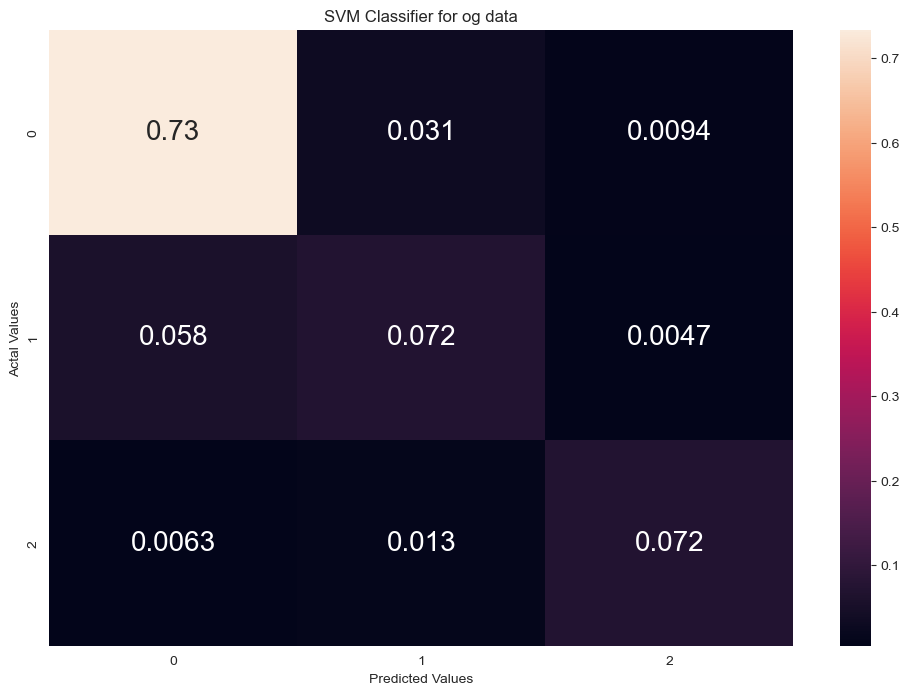

              precision    recall  f1-score   support

           1       0.92      0.95      0.93       494
           2       0.62      0.53      0.57        86
           3       0.84      0.79      0.81        58

    accuracy                           0.88       638
   macro avg       0.79      0.76      0.77       638
weighted avg       0.87      0.88      0.87       638



'              precision    recall  f1-score   support\n\n           1       0.92      0.95      0.93       494\n           2       0.62      0.53      0.57        86\n           3       0.84      0.79      0.81        58\n\n    accuracy                           0.88       638\n   macro avg       0.79      0.76      0.77       638\nweighted avg       0.87      0.88      0.87       638\n'

In [33]:
#model building
svm_clf = SVC(kernel = 'linear')
model_fitting(svm_clf, X_raw_train, y_raw_train, X_raw_test, y_raw_test, plt_title = "SVM Classifier for og data")

### SVM using oversampled data

/Users/karomy/.conda/envs/Project/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training set accuracy:  0.8805755395683453
Test set accuracy:  0.874496644295302


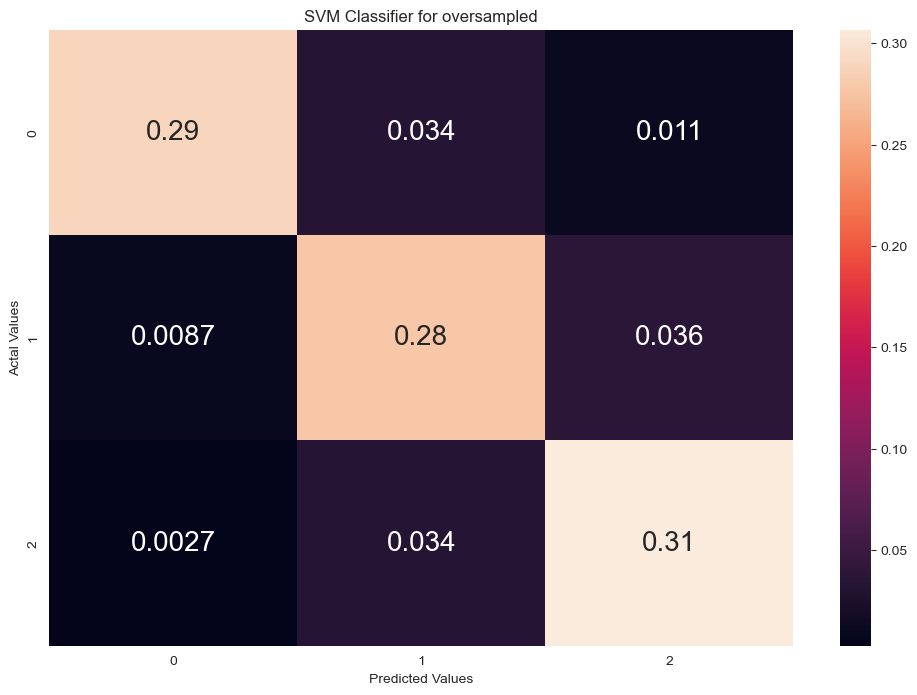

              precision    recall  f1-score   support

           1       0.96      0.87      0.91       498
           2       0.81      0.86      0.83       481
           3       0.87      0.89      0.88       511

    accuracy                           0.87      1490
   macro avg       0.88      0.87      0.88      1490
weighted avg       0.88      0.87      0.88      1490



'              precision    recall  f1-score   support\n\n           1       0.96      0.87      0.91       498\n           2       0.81      0.86      0.83       481\n           3       0.87      0.89      0.88       511\n\n    accuracy                           0.87      1490\n   macro avg       0.88      0.87      0.88      1490\nweighted avg       0.88      0.87      0.88      1490\n'

In [34]:
model_fitting(svm_clf, X_over_train, y_over_train, X_over_test, y_over_test, plt_title = "SVM Classifier for oversampled")

#### Oversampling data improved the precision and recall for both suspect class and pathological class.

## Naive Bayes

### For original dataset

In [35]:
gnb = GaussianNB()
gnb.fit(X_raw_train, y_raw_train)
y_raw_pred = gnb.predict(X_raw_test)

In [36]:
accuracy = accuracy_score(y_raw_test, y_raw_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.80


In [37]:
print(classification_report(y_raw_test, y_raw_pred))

              precision    recall  f1-score   support

           1       0.96      0.82      0.88       494
           2       0.43      0.80      0.56        86
           3       0.66      0.67      0.67        58

    accuracy                           0.80       638
   macro avg       0.69      0.76      0.70       638
weighted avg       0.86      0.80      0.82       638



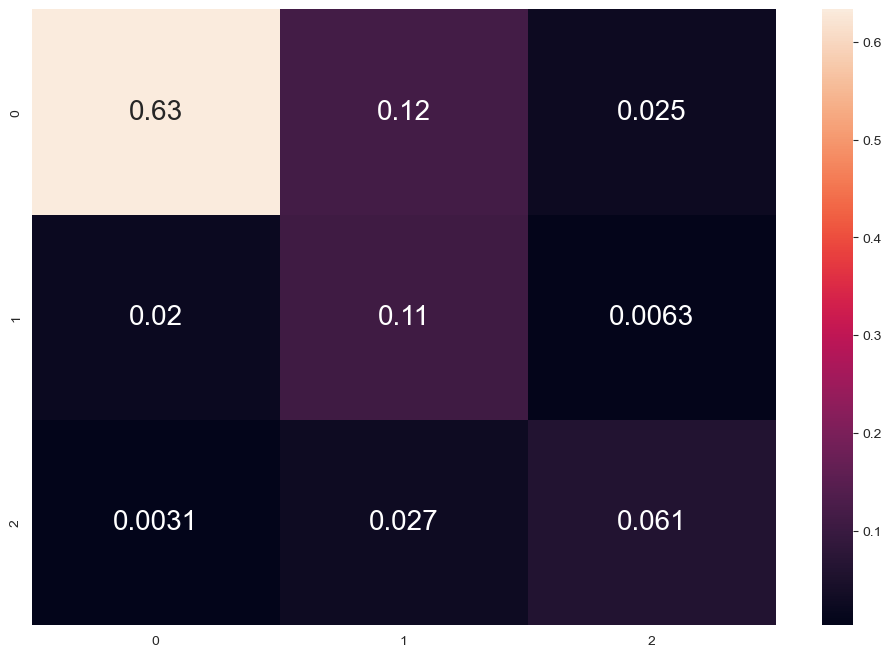

In [38]:
#confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_raw_test, y_raw_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot = True, annot_kws = {'size':20})
plt.show()

### For oversampled dataset

In [39]:
gnb = GaussianNB()
gnb.fit(X_over_train, np.ravel(y_over_train))
y_over_pred = gnb.predict(X_over_test)

In [40]:
accuracy = accuracy_score(y_over_test, y_over_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.75


In [41]:
print(classification_report(y_over_test, y_over_pred))

              precision    recall  f1-score   support

           1       0.98      0.66      0.79       498
           2       0.59      0.95      0.73       481
           3       0.89      0.66      0.76       511

    accuracy                           0.75      1490
   macro avg       0.82      0.76      0.76      1490
weighted avg       0.82      0.75      0.76      1490



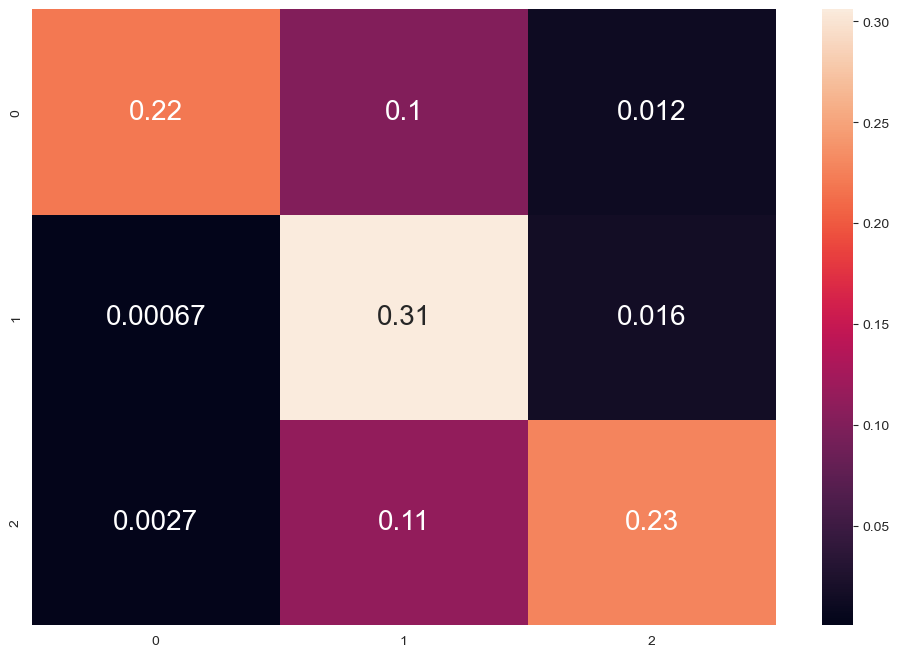

In [42]:
#confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_over_test, y_over_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot = True, annot_kws = {'size':20})
plt.show()

### For Principle components on original data

In [43]:
pca_raw = PCA(n_components=n_components_raw)
pca_X_raw_train = pca_raw.fit_transform(X_raw_train)
pca_X_raw_test = pca_raw.transform(X_raw_test)

In [44]:
gnb = GaussianNB()
gnb.fit(pca_X_raw_train, y_raw_train)
y_raw_pred = gnb.predict(pca_X_raw_test)

In [45]:
accuracy = accuracy_score(y_raw_test, y_raw_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.84


In [46]:
print(classification_report(y_raw_test, y_raw_pred))

              precision    recall  f1-score   support

           1       0.90      0.92      0.91       494
           2       0.55      0.53      0.54        86
           3       0.74      0.59      0.65        58

    accuracy                           0.84       638
   macro avg       0.73      0.68      0.70       638
weighted avg       0.84      0.84      0.84       638



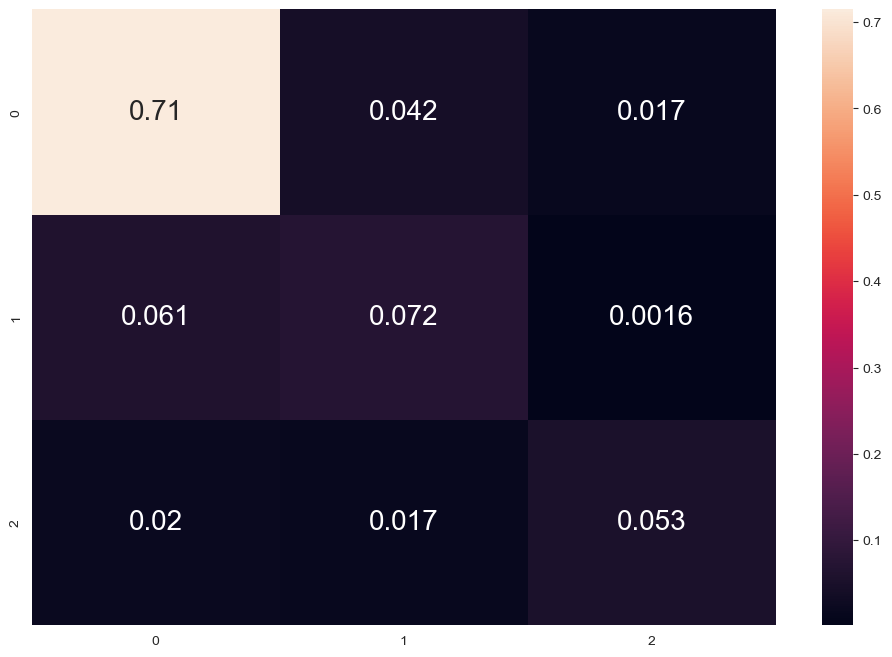

In [47]:
#confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_raw_test, y_raw_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot = True, annot_kws = {'size':20})
plt.show()